In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [278]:
img = cv2.imread("cameraman.tif", 0)
img2 = cv2.imread("rice.png", 0)

print(img.shape)
print(img2.shape)

(256, 256)
(256, 256)


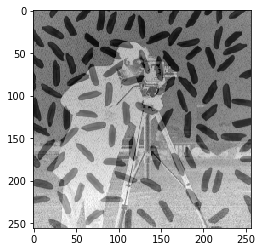

In [279]:
result = 0.3*img + img2*0.7
plt.imshow(255-result, cmap="gray")
plt.show()

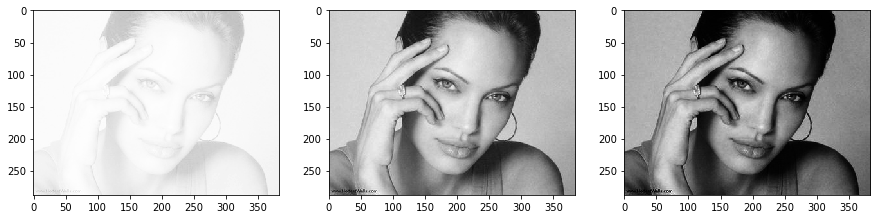

In [280]:
img = cv2.imread("contrast2.jpeg", 0)

plt.figure(figsize=(15,15))
gamma = 0.1
out = (1/(255**(gamma-1))) * (img**gamma)
plt.subplot(1,3,1), plt.imshow(out, cmap="gray")

gamma = 1
out = (1/(255**(gamma-1))) * (img**gamma)
plt.subplot(1,3,2), plt.imshow(out, cmap="gray")

gamma = 2.0
out = (1/(255**(gamma-1))) * (img**gamma)
plt.subplot(1,3,3), plt.imshow(out, cmap="gray")

plt.show()

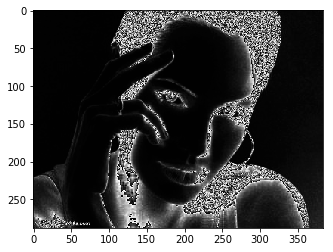

In [295]:
def alg(_img):
  img = _img.copy()
  m = img[0].size
  n = int(img.size/m)
  c = []
  for i in range(n):
    for j in range(m):
      c.append([img[i][j], [i,j]])
  c = sorted(c)
  tot = 0.0
  for i in c:
    x,y = i[1]
    img[x][y] = (float(img.size)/(tot+1.0))**(3.0)
    tot += 1.0
  plt.imshow(img, cmap="gray")
  plt.show()
alg(img)

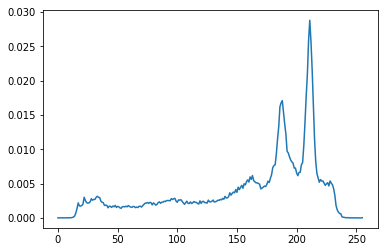

In [282]:
def normalized_histogram(img):
  H = np.zeros((256))
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      H[img[i,j]] += 1
  H = H/(img.shape[0]*img.shape[1])
  return H
h = normalized_histogram(img)
plt.plot(h)
plt.show()

In [0]:
def equalize(img):
  h = normalized_histogram(img)
  A = np.zeros((256))
  A[0] = h[0]
  for i in range(1, 256):
    A[i] = A[i-1] + h[i]
  Out = np.zeros(img.shape)
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      Out[i,j] = A[img[i,j]]
  return (255*Out).astype('uint8')

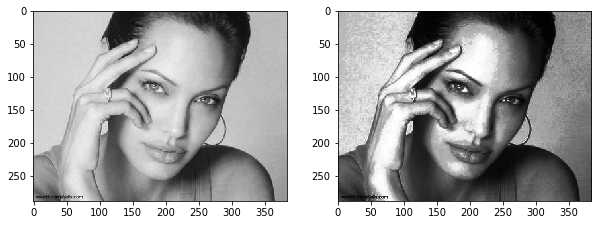

In [289]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img, cmap="gray")

out = equalize(img)
plt.subplot(1,2,2), plt.imshow(out, cmap="gray")
plt.show()

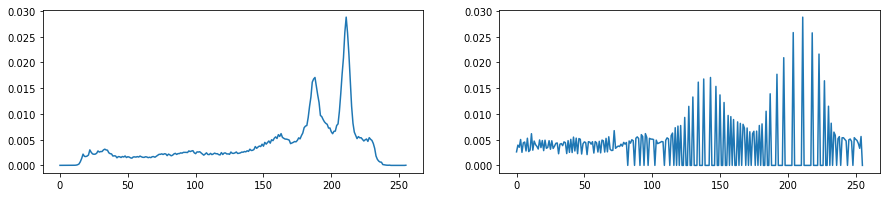

In [294]:
h = normalized_histogram(img)
plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1), plt.plot(h)
h = normalized_histogram(out)
plt.subplot(1, 2, 2), plt.plot(h)
plt.show()